## **TANZANIA WATER WELLS PROJECT**

Authors: Winfred Kabuya

Period : May 2023

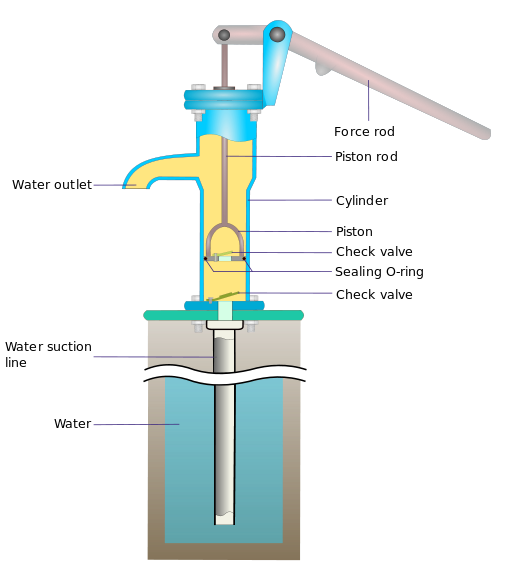


# Introduction

## **Project Overview**

This project aims to develop a classifier that predicts the condition of water wells in Tanzania based on various factors such as the type of pump, installation date, and other relevant information. The target audience for this classifier could be an NGO focused on identifying wells in need of repair or the Government of Tanzania seeking insights to inform future well construction decisions.

## **Business Problem**

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. Almost half the population, lacks access to safe water and do not practice proper sanitation. Which means that they have to spend considerable time and effort to collect water from distant and often unsafe sources like rivers, canals, ponds, hand-dug wells, and natural springs.Despite the challenges, progress has been made in addressing the water crisis.Many water points have already been established in the country, but some are in need of repair while others have failed altogether.

## **Objectives**

The main objectives of the project are as follows:

  - Develop a predictive model to classify the condition of water wells in Tanzania.
  
  - Provide insights into the patterns and factors contributing to non-functional wells.
  
  - Aid NGOs and the Tanzanian government in targeting resources efficiently for well repair and construction initiatives.
  
  - Improve access to clean and safe water for the population of Tanzania.

## **Data Understanding**

The datasets provided by Taarifa and the Tanzanian Ministry of Water, contains information about waterpoints in Tanzania are ;

   - Test set values: The independent variables that need predictions
   - Training set labels: The dependent variable (status_group) for each of the rows in Training set values
   - Training set values: The independent variables for the training set
   
The goal is to predict the operating condition of each waterpoint based on various features. The target variable is the "Status_Group," indicating the current operating condition of the waterpoint. We shall be using datasets from:


The dataset consists of the following features:

    date_recorded: The date when the data was recorded
    funder: The organization or entity that funded the well
    gps_height: The altitude of the well
    installer: The organization responsible for installing the well
    longitude: GPS coordinate of the well's location
    latitude: GPS coordinate of the well's location
    wpt_name: The name of the waterpoint (if applicable)
    basin: The geographic water basin where the well is located
    subvillage: The geographic location of the well (subvillage)
    region: The geographic location of the well (region)
    region_code: Coded representation of the geographic region
    district_code: Coded representation of the district
    lga: The local government authority responsible for the area
    ward: The administrative ward where the well is located
    population: The population size around the well
    public_meeting: A boolean indicating if there was a public meeting to discuss the waterpoint
    recorded_by: The group or organization that recorded the data
    scheme_management: The entity responsible for managing the waterpoint
    permit: Indicates if the waterpoint has the necessary permits
    construction_year: The year when the waterpoint was constructed
    extraction_type: The method used to extract water from the waterpoint
    management: How the waterpoint is managed
    payment_type: The type of payment required for accessing the water
    water_quality: The quality of the water from the waterpoint
    quantity: The quantity of water available from the waterpoint
    source_type: The source type of the waterpoint
    source_class: The source class of the waterpoint
    waterpoint_type: The type or category of the waterpoint

Before applying a model to the dataset, both the training and testing sets will undergo preprocessing steps to handle missing values, outliers, and inconsistencies. Feature engineering techniques may also be applied to extract additional meaningful insights from the available features.

The ultimate aim is to develop a model that can accurately predict the operating condition of waterpoints, thereby assisting in the efficient allocation of resources for repair, maintenance, and new construction initiatives, leading to improved access to clean and safe water for the population in Tanzania.


## **DATA PREPARATION**

## **Importing Necessary Libraries, Loading & Inspecting Datasets**

## **Loading the dataset**

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Explore the dataset
test_set_values = pd.read_csv('Test set values.csv')
training_set_labels = pd.read_csv('Training Set labels.csv')
training_set_values = pd.read_csv('Training set Values.csv')

## **Data Cleaning, Exploration & Visualization**

In [3]:
# A function to print the shape of our datasets
def print_dataset_shape(*datasets):
    """
    Prints the shape of one or more datasets (number of rows and columns).
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        print(f"Dataset {idx + 1} - Number of rows: {dataset.shape[0]}")
        print(f"Dataset {idx + 1} - Number of columns: {dataset.shape[1]}")



In [4]:
# print the shape of our dataset

print_dataset_shape(test_set_values, training_set_labels, training_set_values)

Dataset 1 - Number of rows: 14850
Dataset 1 - Number of columns: 40
Dataset 2 - Number of rows: 59400
Dataset 2 - Number of columns: 2
Dataset 3 - Number of rows: 59400
Dataset 3 - Number of columns: 40


In [5]:
# Lets view the first rows of our dataframes through a function

def display_dataframe_head(dataframes, num_rows=5):
    for name, df in dataframes.items():
        print(f"Head of DataFrame: {name}")
        print(df.head(num_rows))
        print("\n")

dataframes = {
    "DataFrame 1": test_set_values,
    "DataFrame 2": training_set_labels,
    "DataFrame 3": training_set_values
}

display_dataframe_head(dataframes)


Head of DataFrame: DataFrame 1
      id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

   ... payment_type water_quality quality_group      quantity

### Handling Missing Values

In [6]:
#Checking for Duplicates
def check_duplicates(*datasets):
    """
    Checks for duplicates in the provided datasets and prints the number of duplicates for each dataset.
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        num_duplicates = dataset.duplicated().sum()
        print(f"Number of duplicates in Dataset {idx + 1}: {num_duplicates}")

check_duplicates(test_set_values, training_set_labels, training_set_values)

Number of duplicates in Dataset 1: 0
Number of duplicates in Dataset 2: 0
Number of duplicates in Dataset 3: 0


In [7]:
def check_missing_values(*datasets):
    """
    Checks for missing values in the provided datasets and prints the number of missing values for each dataset.
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        missing_values_count = dataset.isnull().sum().sum()
        print(f"Number of missing values in Dataset {idx + 1}: {missing_values_count}")

check_missing_values(test_set_values, training_set_labels, training_set_values)


Number of missing values in Dataset 1: 11464
Number of missing values in Dataset 2: 0
Number of missing values in Dataset 3: 46094


Since these missing values are alot they may contain valuable information.We shall create new features to capture the presence or absence of missing values, which may provide additional insights to the model.

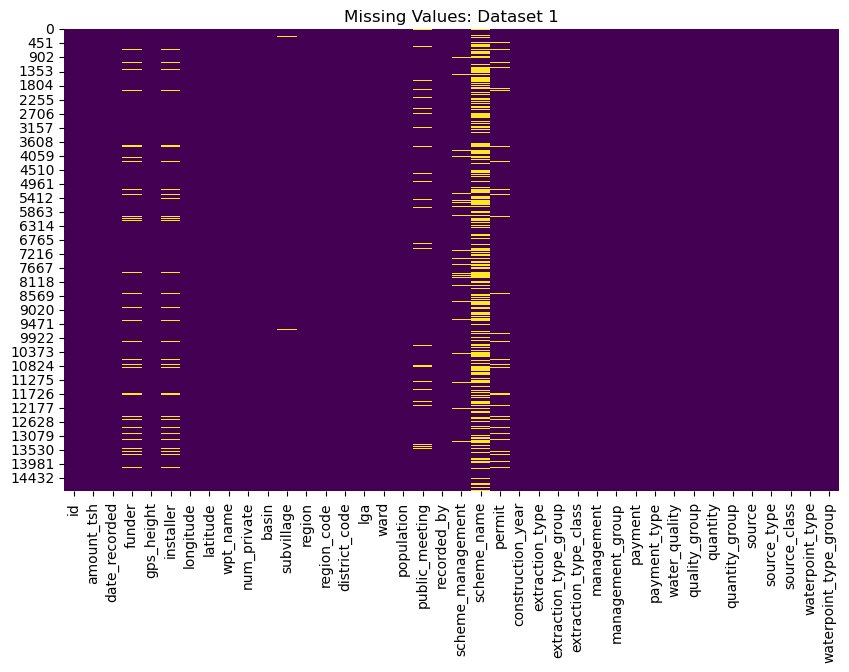

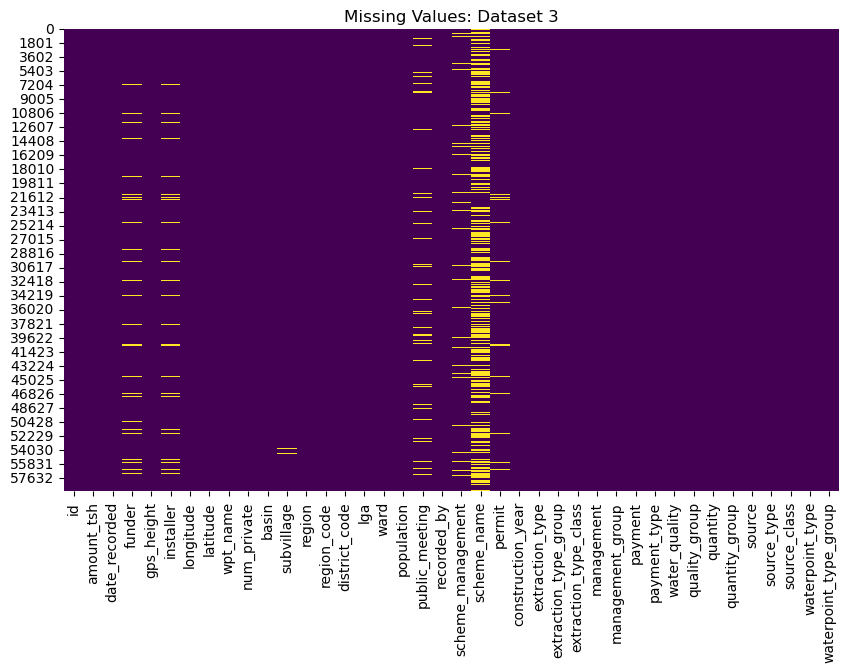

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a function to visualize the missing values
def visualize_missing_values(df, dataset_name):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
    plt.title(f"Missing Values: {dataset_name}")
    plt.show()

# Visualize the missing values for the two datasets
visualize_missing_values(test_set_values, "Dataset 1")
visualize_missing_values(training_set_values, "Dataset 3")


## **Merging datasets**

In [9]:
# Merge training set values and training set labels
training_df = pd.merge(training_set_values, training_set_labels, on='id')
training_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


Merging the training set values and training set labels brings together the independent variables (features) and the dependent variable (target) into a single DataFrame, which is essential for supervised machine learning tasks such as classification.

By merging these two DataFrames, we create a consolidated dataset called training_df. Each row in this DataFrame contains the independent variables from the training_set_values DataFrame along with the corresponding dependent variable from the training_set_labels DataFrame. This merged dataset provides a comprehensive and unified view of the data, allowing us to perform further analysis, preprocessing, and model training effectively.

In [10]:
# Concatenate the training set and test set for preprocessing
combined_df = pd.concat([training_df, test_set_values])
combined_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,NaN
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,NaN
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,NaN
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,NaN


Here we combine the rows from training_df and test_set_values into a single DataFrame.This allows us to apply the same preprocessing steps to both datasets consistently, ensuring that any transformations or modifications are applied uniformly across all the data.

In [11]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [14]:
print(training_df.columns)


Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'subvillage', 'region_code',
       'district_code', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'management_group', 'payment_type', 'water_quality',
       'quantity_group', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')


In [15]:
#columns with similar attributes: we retain those with much information
columns_to_keep = ['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
                   'longitude', 'latitude', 'basin', 'subvillage', 'region_code',
                   'extraction_type', 'management_group', 'payment_type', 'water_quality',
                   'quantity_group', 'source_type', 'source_class', 'waterpoint_type',
                   'waterpoint_type_group', 'status_group']

training_df = training_df.drop(columns=[col for col in training_df.columns if col not in columns_to_keep])

training_df.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,extraction_type,management_group,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,11,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,20,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,21,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,communal standpipe,functional


In [16]:
# to get the count of missing values in each column of the train_df . 
# to identify which columns have missing data
training_df.apply(lambda x: sum(x.isnull()))



amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
subvillage                371
region_code                 0
extraction_type             0
management_group            0
payment_type                0
water_quality               0
quantity_group              0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
status_group                0
dtype: int64

The "funder" column in the dataset has a large number of unique categorical values. Encoding such a column can be challenging due to the increased dimensionality. To simplify the encoding process, we will only consider the top 10 most common values in the "funder" column. The remaining less common values will be grouped together into an "other" category. This approach helps reduce the number of distinct categories and can improve the efficiency of encoding and subsequent analysis.

In [19]:
# to fill the missing values null values) in the funder column
training_df['funder'].fillna(value='none',inplace=True)
# to replace the string '0' with 'none'
# this made our funder column more consistent alloowing better analysis and modelling
training_df['funder'].replace(to_replace = '0', value ='none' , inplace=True)# filling 0 and null values with none

# to see the top 10 funders with the highest occurrence counts in the 'funder' column of the DataFrame to deduce insights into the most common sources of funding for the wells in Tanzania.
training_df.funder.value_counts().head(10)

Government Of Tanzania    9084
none                      4412
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
Name: funder, dtype: int64

In [26]:
# to combine all subsets into a single dataframe using pd.concat() function
df1 = training_df.loc[training_df['funder'] == 'Government Of Tanzania']
df2 = training_df.loc[training_df['funder'] == 'Danida']
df3 = training_df.loc[training_df['funder'] == 'Hesawa']
df4 = training_df.loc[training_df['funder'] == 'Rwssp']
df5 = training_df.loc[training_df['funder'] == 'World Bank']
df6 = training_df.loc[training_df['funder'] == 'Kkkt']
df7 = training_df.loc[training_df['funder'] == 'World Vision']
df8 = training_df.loc[training_df['funder'] == 'Unicef']
df9 = training_df.loc[training_df['funder'] == 'Tasaf']
df10 = training_df.loc[training_df['funder'] == 'none']
df_funder = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
# new DataFrame contains all the rows from the original DataFrame 
# the 'funder' column matches the specified funders.

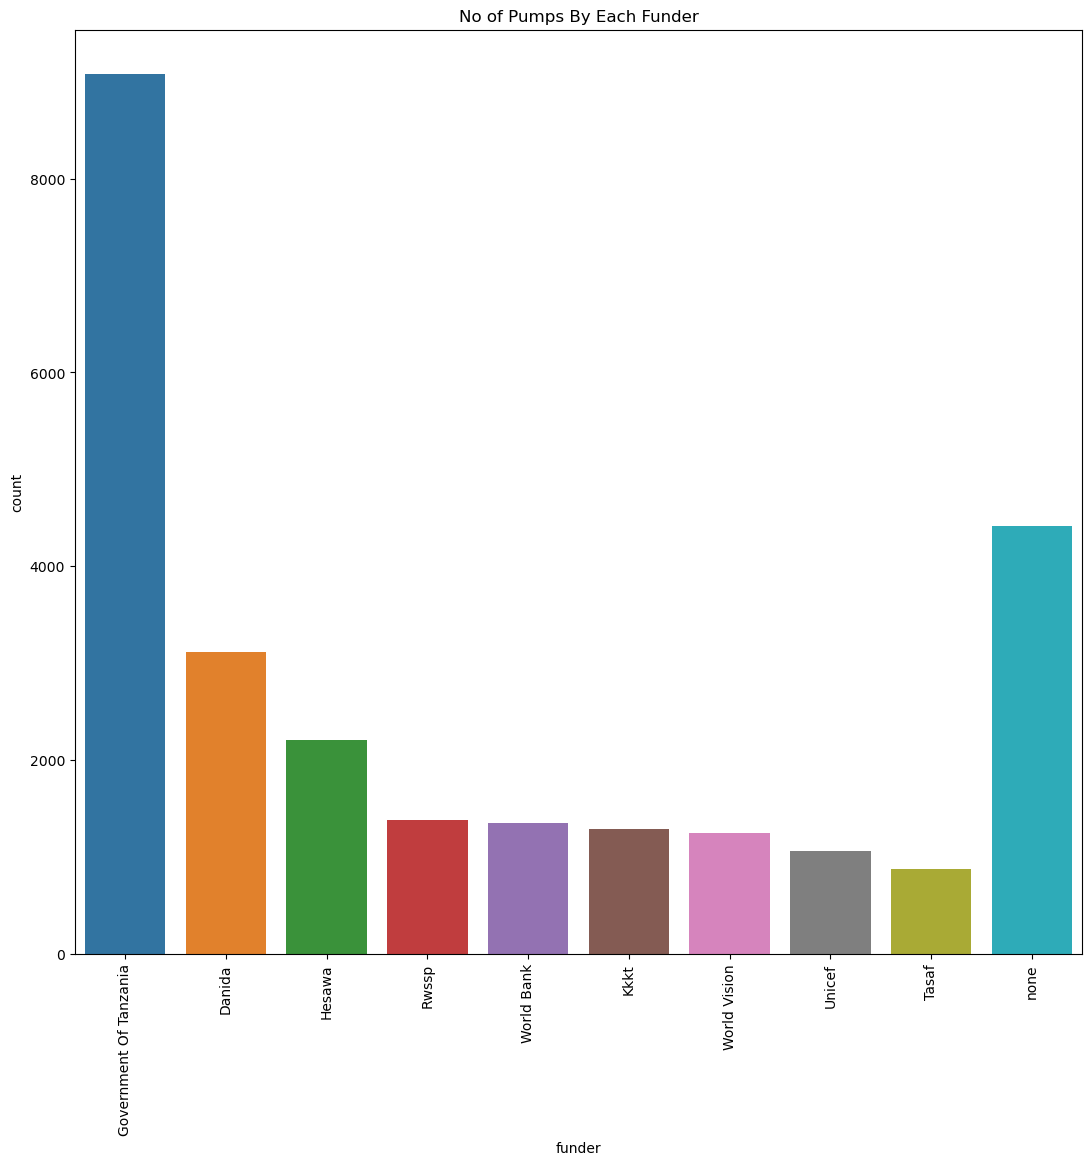

In [28]:
plt.figure(figsize=(13,12))
ax = sns.countplot(x='funder', data=df_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('No of Pumps By Each Funder')
plt.show()
# a bar plot showing the number of pumps associated with each funder, allowing us to visualize and compare their contributions.


This visualization allows us to compare pump distribution among funders. It also provided insights into the working conditions of the pumps associated with each funder.

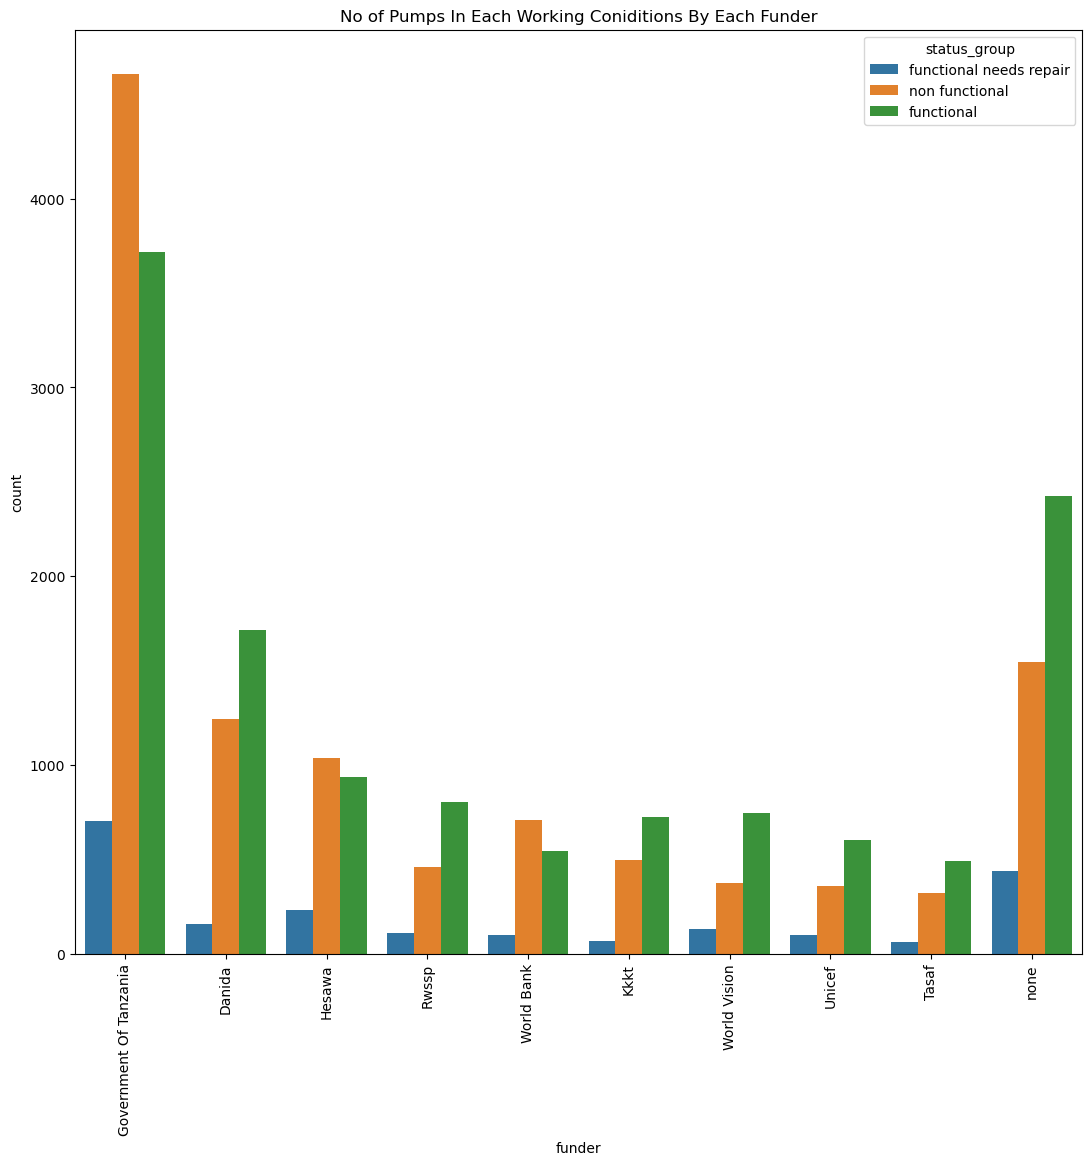

In [29]:
plt.figure(figsize=(13,12))
ax = sns.countplot(x='funder', hue="status_group", data=df_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('No of Pumps In Each Working Coniditions By Each Funder')
plt.show()



Based on the analysis, most of the non-functional water points were funded by the government. 

To facilitate further analysis and comparison, i created a new column called 'funder_cat' in the training_df DataFrame. The values from the existing 'funder' column were assigned to this new column. By doing so, a duplicate column with a different name was generated, enabling the data to be analyzed and compared based on grouped funders.

This approach allowed for a consolidated view of the funders, while categorizing the remaining funders as "Others" in the 'funder_cat' column. This grouping simplified and aggregated the data, making it easier to interpret and draw insights based on different funders. The specific funders in the c_fund group retained their original names, while all other funders were labeled as "Others" in the 'funder_cat' column.

In [30]:
# To group values together

training_df['funder_cat'] = training_df['funder'] #creating new column

c_fund = ['Danida','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council']

training_df.loc[~training_df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"



In [31]:
# to obtain the no of unique values
training_df['funder_cat'].nunique()
# This count represents the number of distinct funders after the grouping operation. 
# Each unique value corresponds to a specific funder category, including the individual funders explicitly mentioned and the "Others" category.
# We have 11 unique values for this column

11

Let's remove the 'funder' column from our data frame

In [32]:
training_df.drop(columns=['funder'],inplace=True )


## **Preprocessing and feature engineering**

In [ ]:
# Function to perform preprocessing and feature engineering
def preprocess_data(df):
    # Handle missing values
    df.fillna(value=0, inplace=True)  # Replace missing values with 0 (or any other suitable value)
    
    # Example: Encode categorical variables
    categorical_cols = ['funder', 'installer', 'extraction_type']
    df_encoded = pd.get_dummies(df, columns=categorical_cols)
    
    # Example: Feature engineering
    df_encoded['age'] = df_encoded['date_recorded'].apply(lambda x: 2023 - int(x[:4]))  # Calculate age
    
    # Return the preprocessed dataframe
    return df_encoded

In [ ]:
# Apply preprocessing to the combined dataset
preprocessed_df = preprocess_data(combined_df)  
print(preprocessed_df.head())


In [ ]:
# Split the preprocessed dataset back into training and test datasets
training_preprocessed_df = preprocessed_df[:len(training_df)]
test_preprocessed_df = preprocessed_df[len(training_df):]


This ensures that any preprocessing and feature engineering steps are consistently applied to both datasets.It is important to ensure that the model is trained and evaluated on the same types of data.

In [ ]:
# Split the training dataset into features (X) and the target variable (y)
X_train = training_preprocessed_df.drop('status_group', axis=1)
y_train = training_preprocessed_df['status_group']


By splitting the training dataset into features and the target variable, we separate the input variables from the output variable, which is necessary for training a supervised machine learning model. The model will use the features (X_train) to learn patterns and make predictions about the target variable (y_train).

In [ ]:
# Display the preprocessed training dataset
print(X_train.head())
print(X_train.info())


### **Data splitting**

Data splitting is essential for evaluating the model's performance on unseen data (validation set) during the training process.

In [ ]:
#Import the relevant dataframe
from sklearn.model_selection import train_test_split

# Split the preprocessed training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


The data will be split into the following sets:

    X_train: The features (independent variables) for training the model.
    y_train: The target variable (dependent variable) corresponding to the training set.
    X_val: The features for validating the model.
    y_val: The target variable corresponding to the validation set.

### **Model Selection and Training**

In [ ]:
#import the relevant dataframe
#from sklearn.model_selection import cross_val_score
#from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
#rf_classifier = RandomForestClassifier()

# Train the model on the training data
#rf_classifier.fit(X_train, y_train)

# Use cross-validation to estimate the model's performance
#cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
#print("Cross-Validation Scores:", cv_scores)
#print("Mean Cross-Validation Score:", cv_scores.mean())


The *rf_classifier* object will be trained and ready to make predictions on new, unseen data. The training process involves learning patterns and relationships within the training data, enabling the classifier to generalize and make accurate predictions on similar data instances.